## Solving an ODE using `scipy.integrate.odeint`

# Content:

 1. [First-order ordinary differential equation (ODE)](#ode)
 2. [Modeling Exponential Growth with `odeint` and an Analytic Solution](#exponential)
 3. [Exponential Growth with Attrition: Solving with `odeint` and an Analytic Solution](#attrition)
 4. [Comparing Exponential Growth With and Without Attrition](#comparison) 
 5. [Logistic Growth: Bounded Exponential Growth](#logistic)
 6. [Gompertz Growth Model: A model for bird weight](#gompertz)
 7. [🐟 Exercise: A Model for Fish Growth](#fish)

## 1. <a name="ode">First-order ordinary differential equation (ODE)</a>

Consider the differential equation:

$$
\frac{dy}{dt} = -k y
$$

This equation doesn't uniquely determine a single function. Its general solution is:

$$
y(t) = C e^{-k t}
$$

where $ C $ is an arbitrary constant. So, there are _infinitely many solutions_, one for each possible value of $ C $.

---

### What Makes It an Initial Value Problem?

When we specify an _initial condition_, such as:

$$
y(0) = y_0
$$

we select _a unique solution_ from the infinite family. Now the constant becomes:

$$
C = y_0
$$

and the specific solution is:

$$
y(t) = y_0 e^{-k t}
$$

This is what we call an _Initial Value Problem (IVP)_: we are given the value of the function at the start (initial time), and we solve forward from there.

---

###  `odeint` Solves IVPs

The function `scipy.integrate.odeint` is designed to solve _initial value problems_ for ODEs. It needs:
- a differential equation (like $ \frac{dy}{dt} = f(y, t) $),
- an initial condition $ y(0) = y_0 $,
- and a range of time values.

This setup ensures the solution is _unique_ and can be computed numerically.

---

### Summary

- A differential equation without initial/boundary conditions has _infinitely many solutions_.
- `odeint` solves _initial value problems_ by computing the unique solution that passes through the initial point.

---


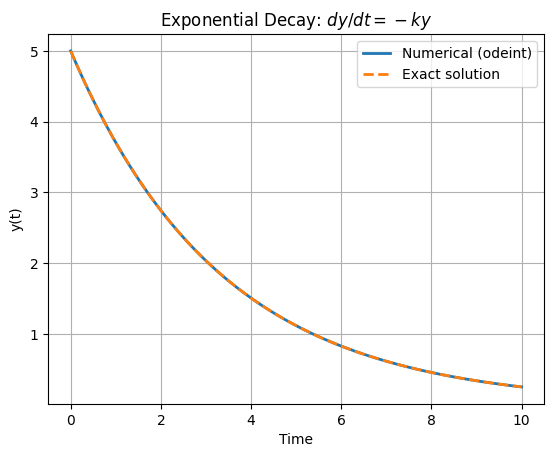

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the ODE as a Python function
def decay(y, t, k):
    return -k * y

# Initial condition
y0 = 5

# Time points for evaluation
t = np.linspace(0, 10, 100)

# Decay constant
k = 0.3

# Solve ODE using odeint
solution = odeint(decay, y0, t, args=(k,))

# Exact solution for comparison
exact = y0 * np.exp(-k * t)

# Plot the results
plt.plot(t, solution, label='Numerical (odeint)', lw=2)
plt.plot(t, exact, '--', label='Exact solution', lw=2)
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Exponential Decay: $dy/dt = -k y$')
plt.legend()
plt.grid(True)
plt.show()

## 2. <a name="exponential">Modeling Exponential Growth with `odeint` and an Analytic Solution</a>


This example illustrates how to model _exponential growth_, which is common in population dynamics, radioactive decay (with negative rate), finance, and other natural processes.

---

### The Mathematical Model

We use the differential equation:

$$
\frac{dP}{dt} = A \cdot P
$$

Where:
- $ P(t) $ is the population at time $ t $,
- $ A $ is the _growth rate_,
- This is a _first-order ODE_ that describes how the population grows proportionally to its current size.

The _analytic solution_ to this differential equation is:

$$
P(t) = P_0 \cdot e^{A t}
$$

where $ P_0 $ is the initial population at $ t = 0 $.

---

### Solving the ODE

We’ll solve this in -two ways_:

1. _Numerically_ using `scipy.integrate.odeint`
2. _Analytically_ using the exact exponential formula

Then, we compare the two solutions to validate the numerical integration.

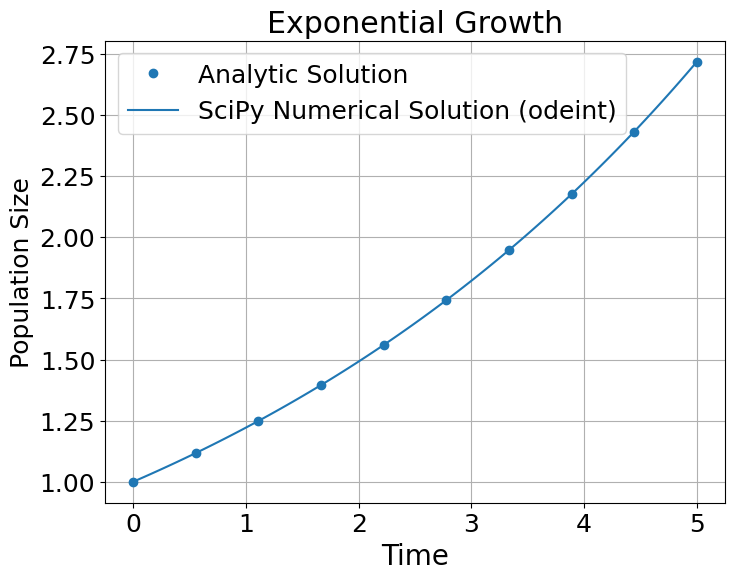

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Exponential growth model
def growth(P, t, A):
    return A * P

# Analytic solution
def solution(t, P0, A):
    return P0 * np.exp(A * t)

# Initial population
P0 = 1

# Time points
t = np.linspace(0, 5, 100)   # Dense grid for numerical solution
t2 = np.linspace(0, 5, 10)   # Sparse grid for plotting analytic markers

# Growth rate
A = 0.2

# Solve the ODE numerically
solution_scipy = odeint(growth, P0, t, args=(A,))

# Compute the exact analytic solution
solution_analytic_exp = solution(t2, P0, A)

# Plotting both solutions
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 6))
plt.plot(t2, solution_analytic_exp, label='Analytic Solution', linestyle='', marker='o', color='tab:blue')
plt.plot(t, solution_scipy, label='SciPy Numerical Solution (odeint)', linestyle='-', color='tab:blue')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Population Size')
plt.title('Exponential Growth')
plt.legend()
plt.grid(True)
plt.savefig("exp.png", bbox_inches='tight')
plt.show()


## 3. <a name="attrition">Exponential Growth with Attrition: Solving with `odeint` and an Analytic Solution</a>

This example extends the classic exponential growth model by introducing a _constant attrition term_, modeling situations where a population grows naturally but loses members at a steady rate (e.g., migration, deaths, consumption, etc.).

---

###  The Mathematical Model

We now consider the ODE:

$$
\frac{dP}{dt} = A \cdot P - B
$$

Where:
- $ P(t) $ is the population at time $ t $,
- $ A $ is the _growth rate_ (proportional growth),
- $ B 4 is the _constant attrition rate_ (linear loss).

---

### Analytic Solution

This ODE has a closed-form analytic solution:

$$
P(t) = \left(P_0 - \frac{B}{A} \right) e^{A t} + \frac{B}{A}
$$

where:
- $ P_0 $ is the initial population size,
- $ \frac{B}{A} $ is the _equilibrium value_ (the long-term steady-state population).

This shows how the population grows towards a limit (if $ A > 0 $) or decays away (if $ A < 0 $) depending on the relative values of $ A $ and $ B $.

---

### Solving the ODE Numerically

As before, we’ll solve this using both:
1. `odeint` from SciPy for the numerical solution
2. The _analytic formula_ for validation

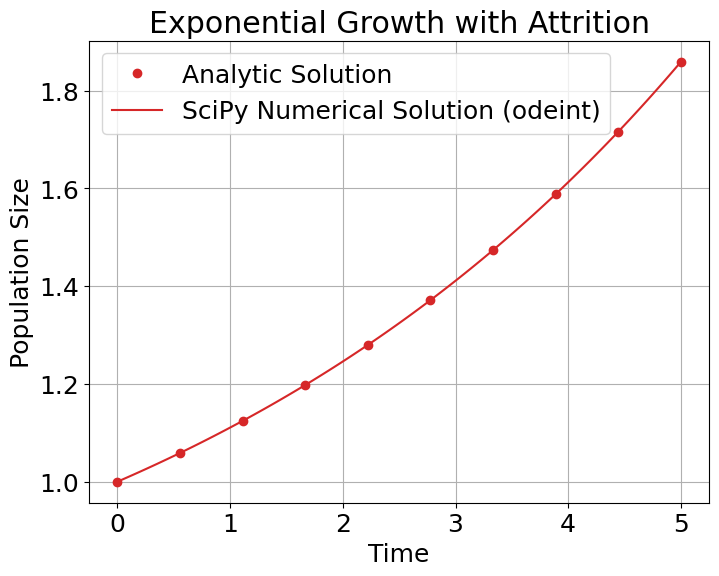

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Exponential growth with constant attrition
def growth(P, t, A, B):
    return A * P - B

# Analytic solution
def solution(t, P0, A, B):
    return (P0 - B/A) * np.exp(A * t) + B/A

# Initial population
P0 = 1

# Time points
t = np.linspace(0, 5, 100)    # Fine grid for odeint
t2 = np.linspace(0, 5, 10)    # Coarse grid for markers

# Parameters
A = 0.2   # Growth rate
B = 0.1   # Attrition rate

# Numerical solution
solution_scipy = odeint(growth, P0, t, args=(A, B))

# Analytic solution
solution_analytic_exp_attr = solution(t2, P0, A, B)

# Plotting
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 6))
plt.plot(t2, solution_analytic_exp_attr, label='Analytic Solution', linestyle='', marker='o', color='tab:red')
plt.plot(t, solution_scipy, label='SciPy Numerical Solution (odeint)', linestyle='-', color='tab:red')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Exponential Growth with Attrition')
plt.legend()
plt.grid(True)
plt.savefig("exp_attr.png", bbox_inches='tight')
plt.show()


## 4. <a name="comparison">Comparing Exponential Growth With and Without Attrition</a>

In this section, we compare two models of population growth:

1. Pure Exponential Growth 
   $$\frac{dP}{dt} = A \cdot P$$

2. Exponential Growth with Constant Attrition 
   $$\frac{dP}{dt} = A \cdot P - B$$

---

### Intuition Behind the Models

- The first model shows how a population (or investment, or process) grows proportionally to its current size. There is no limiting factor.
- The second model adds a constant negative term \( B \), simulating steady loss or attrition (e.g., deaths, resource usage, outflow).

---

### Analytic Solutions

- **Pure Growth:**
  $$P(t) = P_0 \cdot e^{A t}$$

- **Growth with Attrition:**
  $$P(t) = \left(P_0 - \frac{B}{A} \right) e^{A t} + \frac{B}{A}$$

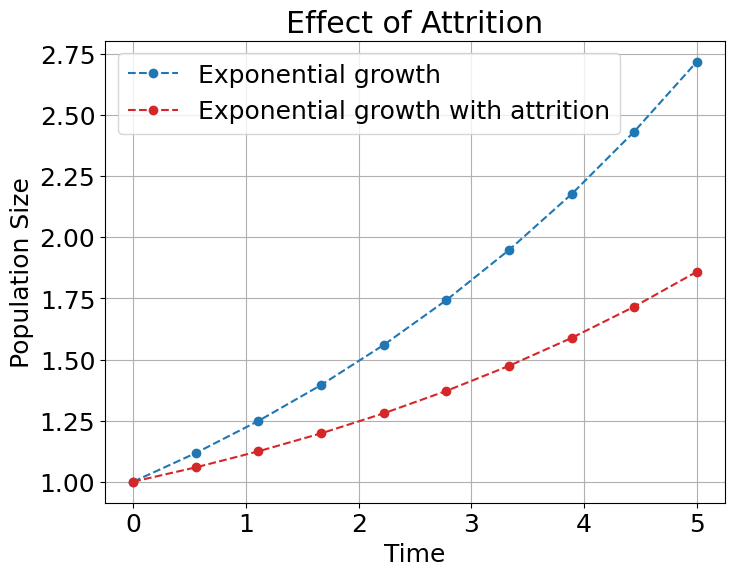

In [4]:
plt.rcParams.update({'font.size': 18}) 
plt.figure(figsize=(8, 6))
plt.plot(t2, solution_analytic_exp, label='Exponential growth', linestyle='--', marker='o', color='tab:blue')
plt.plot(t2, solution_analytic_exp_attr, label='Exponential growth with attrition', linestyle='--', marker='o', color='tab:red')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Effect of Attrition')
plt.legend()
plt.grid(True)
plt.savefig("exp_attr_compare.png", bbox_inches='tight')
plt.show()

## 5. <a name="logistic">Logistic Growth: Bounded Exponential Growth</a>


In nature, growth is often limited by resources like space, food, or energy. The _logistic growth model_ is a classic way to capture this phenomenon by introducing a _carrying capacity_ — the maximum sustainable population size.

---

### The Mathematical Model

The logistic growth differential equation is:

$$
\frac{dP}{dt} = A \cdot P \left(1 - \frac{P}{C}\right)
$$

Where:
- $ P(t) $ is the population at time $ t $,
- $ A $ is the _intrinsic growth rate_,
- $ C $ is the _carrying capacity_, the maximum value $ P(t) $ can approach.

---

### Analytic Solution

The logistic equation has an analytic solution:

$$
P(t) = \frac{C}{1 + \left( \frac{C - P_0}{P_0} \right) e^{-A t}}
$$

Where $ P_0 $ is the initial population size. This S-shaped (sigmoidal) curve captures:
- Exponential growth when $ P \ll C $,
- Slowing growth as $ P \to C $,
- Saturation where $ P(t) \approx C $.

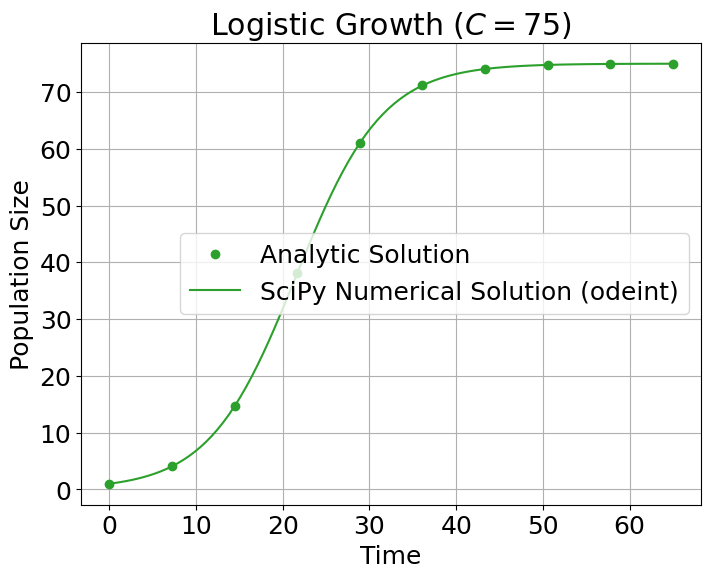

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Logistic growth differential equation
def growth(P, t, A, C):
    return A * P * (1 - P / C)

# Analytic solution to the logistic equation
def solution(t, P0, A, C):
    return C / (1 + ((C - P0) / P0) * np.exp(-A * t))

# Parameters and initial condition
P0 = 1       # Initial population
A = 0.2      # Growth rate
C = 75       # Carrying capacity

# Time points
t = np.linspace(0, 65, 100)   # Dense for odeint
t3 = np.linspace(0, 65, 10)   # Sparse for markers

# Solve numerically with odeint
solution_scipy = odeint(growth, P0, t, args=(A, C))

# Solve analytically
solution_analytic_exp_attr = solution(t3, P0, A, C)

# Plot the results
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 6))
plt.plot(t3, solution_analytic_exp_attr, label='Analytic Solution', linestyle='', marker='o', color='tab:green')
plt.plot(t, solution_scipy, label='SciPy Numerical Solution (odeint)', linestyle='-', color='tab:green')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Logistic Growth ($C=75$)')
plt.legend(loc='right')
plt.grid(True)
plt.savefig("logistic.png", bbox_inches='tight')
plt.show()

## 6. <a name="gompertz">Gompertz Growth Model: A model for bird weight</a>


In many real-world systems, growth is not symmetric like logistic growth. For example:
- _Tumor growth_, _bacterial colonies_, and _human mortality rates_ often grow _quickly at first_, then _slow down rapidly_ before leveling off.
- The _Gompertz function_ models this behavior well — it is a _sigmoidal_ (S-shaped) function but with an _asymmetric curve_, where the point of maximum growth is skewed toward the beginning.

The Gompertz growth model is widely used in _ornithology_ and _avian developmental biology_ to model the _growth patterns of birds_.

---

###  Why Use the Gompertz Model for Birds?

Bird growth often follows an _asymmetric S-shaped curve_:

1. Rapid early growth shortly after hatching,
2. Followed by a slower phase as the bird approaches its adult size.
3. It captures biological constraints such as food availability and metabolic limits.
---

### The Mathematical Model

The _Gompertz differential equation_ is:

$$
\frac{dP}{dt} = A \cdot P \cdot \ln\left(\frac{C}{P}\right)
$$

or

$$
\frac{dP}{dt} = A \cdot P \cdot \left(\ln C - \ln P\right)
$$

Where:
- $ P(t) $ is the population (or size) at time $ t $,
- $ A $ is the _growth rate constant_,
- $ C $ is the _carrying capacity_ (maximum size),
- The function $ \ln(C/P) $ introduces _asymmetric deceleration_ as $ P \to C $.

---

### Analytic Solution

The closed-form solution of the Gompertz equation is:

$$
P(t) = C \cdot \exp\left[ -\exp\left( -A t + \ln\left(\ln\left(\frac{C}{P_0}\right)\right) \right) \right]
$$

Or equivalently (with simplification):

$$
P(t) = C \cdot e^{ -e^{-A t + B} }
$$

Where $ B = \ln(\ln(C/P_0)) $ ensures the initial condition $ P(0) = P_0 $ is satisfied.


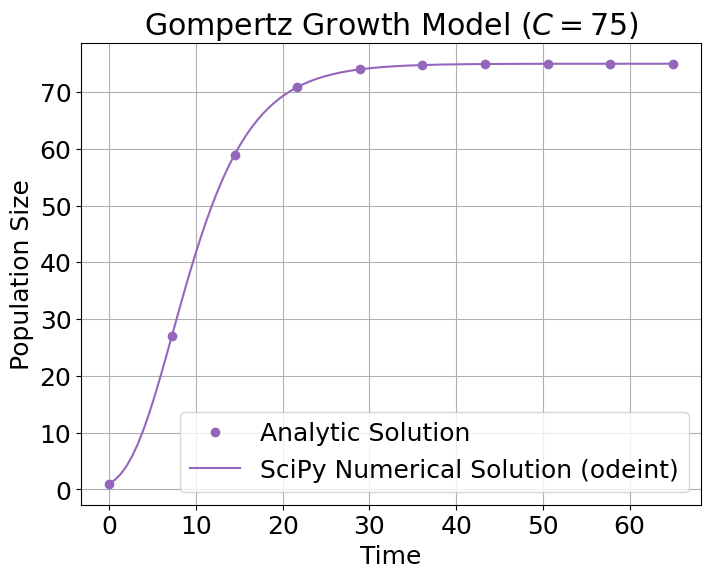

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Gompertz differential equation
def growth(P, t, A, C):
    return A * P * np.log(C / P)

# Gompertz analytic solution
def solution(t, P0, A, C):
    B = np.log(np.log(C / P0))
    return C * np.exp(-np.exp(-A * t + B))

# Initial population
P0 = 1

# Parameters
A = 0.2     # Growth rate
C = 75      # Carrying capacity

# Time points
t = np.linspace(0, 65, 100)
t4 = np.linspace(0, 65, 10)

# Numerical solution using odeint
solution_scipy = odeint(growth, P0, t, args=(A, C))

# Analytic solution
solution_analytic = solution(t4, P0, A, C)

# Plotting
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 6))
plt.plot(t4, solution_analytic, label='Analytic Solution', linestyle='', marker='o', color='tab:purple')
plt.plot(t, solution_scipy, label='SciPy Numerical Solution (odeint)', linestyle='-', color='tab:purple')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Gompertz Growth Model ($C=75$)')
plt.legend()
plt.grid(True)
plt.savefig("gompertz.png", bbox_inches='tight')
plt.show()

## 7. <a name="fish">🐟 Exercise: A Model for Fish Growth</a>

A biologically inspired model describes the growth of a fish by relating its weight, $W(t)$, to its age, $t$, (in weeks). The rate of weight change is influenced by both tissue growth and tissue breakdown, and is given by the differential equation:

$$
\frac{dW}{dt} = r W^{2/3} \left[ 1 - \left( 1 - \frac{W}{K} \right)^{1/3} \right],
$$

where:

- $W(t)$ is the weight of the fish (e.g., in grams),
- $r$ is a growth rate constant (e.g., in g\(^{1/3}\)/week),
- $K$ is the maximum adult weight,
- $t$ is time in weeks.

The model captures surface area-driven growth ($W^{2/3}$) and slowdown near maturity (as $W \to K$).

---

### Tasks

1. Choose meaningful values for:
   - Growth rate $r$ (e.g., between 0.05 and 0.5),
   - Adult weight $K$ (e.g., 1000 grams),
   - Initial weight $W(0)$ (e.g., 1–5 grams for a young fish).

2. Use `scipy.integrate.odeint` to solve the differential equation over a time range of 0 to 100 weeks.

3. Plot the weight $W(t)$ over time and describe the shape of the curve.

---

### Extension: Harvesting

Real fisheries often remove fish over time. You can modify the equation to include a constant _harvesting rate_ $h$:

$$
\frac{dW}{dt} = r W^{2/3} \left[ 1 - \left( 1 - \frac{W}{K} \right)^{1/3} \right] - h
$$

Try experimenting with different values of $h$ and see how they affect long-term fish growth. **What happens if harvesting exceeds growth?** Can we see this effect graphically?

---